In [1]:
# do necessary imports
%pip install git+https://github.com/delbempedro/ic
%pip install pylatexenc
from ic import *
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from matplotlib import pyplot as plt

  Cloning https://github.com/delbempedro/ic to /tmp/pip-req-build-45jc0f87
  Running command git clone --filter=blob:none --quiet https://github.com/delbempedro/ic /tmp/pip-req-build-45jc0f87
  Resolved https://github.com/delbempedro/ic to commit 549cfca0c9034670059f75facc19ef363533b3a1
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=11a376b36cc914904a799e81a6fd895f7bbf86104c8a96e9f0a995a1cb72b6fb
  Stored in directory: /home/ubuntu/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
Note: you may need to restart the kernel to use updated packages.


to defines the quantum circuit with n qbits end m classical bits write
"
my_quantun_circuit = current_circuit(8,5)
"

to add a full adder circuit write
"
my_quantun_circuit.add_full_adder(1,1,0,0,carry_in=True)
"
#First two arguments are the values ​​of the qbits and the other two values ​​are the position of the first qbit and the first classical bit. The argument "carry_in = True" sets the carry in value to 1 (default = 0)

to add a simple adder circuit write
"
my_quantun_circuit.adds_simple_adder(1,1,0,0)
"
#First two arguments are the values ​​of the qbits and the other two values ​​are the position of the first qbit and the first classical bit

to draw the quantun circuit write
"
my_qc = my_quantun_circuit.get_current_circuit()
my_qc.draw(output='mpl',style='iqp')
"

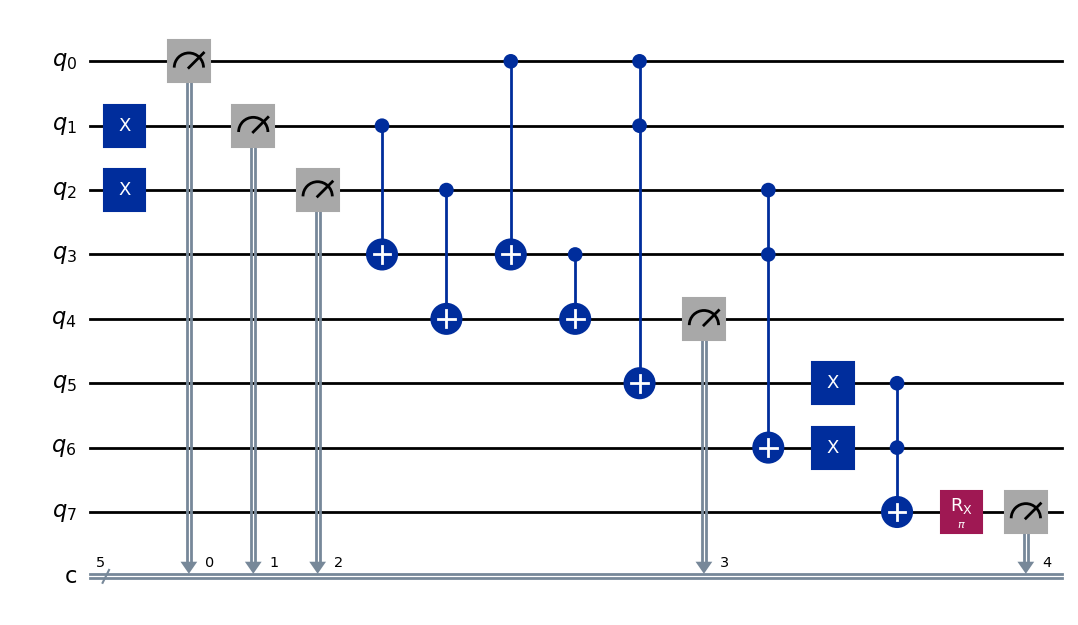

In [2]:
|#example
qc = current_circuit(8,5)
qc.add_full_adder(1,1,0,0,carry_in=True)
my_qc = qc.get_current_circuit()
my_qc.draw(output='mpl',style='iqp')

to create your token, you need to create a ibm account in
https://quantum.ibm.com/
and your token is "API Token" in the top right corner of the page

In [ ]:
#save your ibm account
# save your token to your ibm_quantum account
print("Insert your token:")
my_token = input()
QiskitRuntimeService.save_account(
    overwrite=True,
    channel="ibm_quantum",
    token=my_token
)

In [ ]:
#configure your service
service = QiskitRuntimeService()

In [ ]:
#transpile your circuit
backend = service.least_busy(operational=True, simulator=False)
pass_manager = generate_preset_pass_manager(backend=backend, optimization_level=1)
qc_transpiled = pass_manager.run(qc)
sampler = Sampler(backend)

In [ ]:
#run your circuit with samples
job = sampler.run([qc_transpiled])
result = job.result()

In [ ]:
#filter data
data = result[0].data.c.get_counts()
threshold = 10
filtered_data = {key: value for key, value in data.items() if value > threshold}

In [ ]:
#set graph title
print("Insert graph title:")# something like: "Full Adders (inputs: 1,1 carry in 0)"
title = input()
print(title)

In [ ]:
#plot your histogram with results and save image
names = list(filtered_data.keys())
values = list(filtered_data.values())

plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title(title)
plt.bar(names, values, tick_label=names)
plt.show()